In [5]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [7]:
classifier_model_url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier = models.Sequential([
        layers.Input(shape=IMAGE_SHAPE + (3,)),
        layers.Lambda(lambda x: hub.KerasLayer(classifier_model_url)(x))
    ])

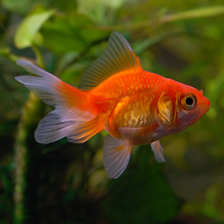

In [8]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [9]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [10]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [11]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(1, 1001)

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

np.int64(2)

In [13]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [14]:
image_labels[predicted_label_index]

'goldfish'

## Flower Image Classification

In [16]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, cache_dir='E:\DeepLearning\CNN', untar=True)
data_dir = pathlib.Path("datasets/flower_photos_extracted/flower_photos")

In [17]:
data_dir

WindowsPath('datasets/flower_photos_extracted/flower_photos')

In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
import cv2

img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [22]:
img.shape

(240, 179, 3)

In [23]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [47]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [48]:
X = np.array(X)
y = np.array(y)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [51]:
X_train_scaled[0]

array([[[0.27843137, 0.3254902 , 0.31764706],
        [0.24705882, 0.28235294, 0.2627451 ],
        [0.25490196, 0.27058824, 0.24705882],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.23137255, 0.25882353, 0.25490196],
        [0.23137255, 0.25490196, 0.23529412],
        [0.25490196, 0.2627451 , 0.23921569],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.21960784, 0.22352941, 0.21960784],
        [0.23921569, 0.24313725, 0.22745098],
        [0.25098039, 0.25098039, 0.22745098],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16470588, 0.15294118]],

       ...,

       [[0.19215686, 0.49803922, 0.37647059],
        [0.14901961, 0.2627451 , 0.19607843],
        [0.20392157, 0

In [29]:
X[0].shape

(180, 180, 3)

In [30]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [31]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

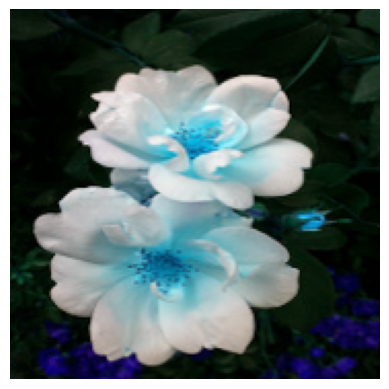

In [32]:
plt.axis('off')
plt.imshow(X[0])

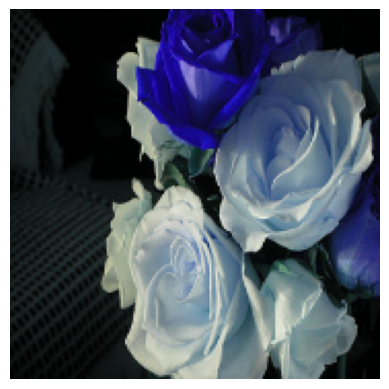

In [33]:
plt.axis('off')
plt.imshow(X[1])

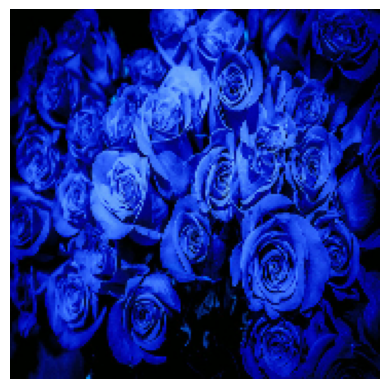

In [34]:
plt.axis('off')
plt.imshow(X[2])

In [35]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


array([795, 795, 795])

In [36]:
image_labels[795]

'shower curtain'

## Take pre-trained model and retrain it using flowers images

In [37]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor_model = mobilenet_v2

In [38]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [43]:
import tf_keras as keras

num_classes=5

model = keras.Sequential([
  feature_extractor_layer,
  keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [52]:
model.compile(
  optimizer="adam",
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5



86/86 [==============================] - 47s 392ms/step - loss: 0.7830 - acc: 0.7144
Epoch 2/5
86/86 [==============================] - 36s 415ms/step - loss: 0.3966 - acc: 0.8677
Epoch 3/5
86/86 [==============================] - 39s 457ms/step - loss: 0.3151 - acc: 0.8975
Epoch 4/5
86/86 [==============================] - 35s 402ms/step - loss: 0.2629 - acc: 0.9211
Epoch 5/5
86/86 [==============================] - 32s 374ms/step - loss: 0.2264 - acc: 0.9335


In [53]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 16s 400ms/step - loss: 0.3680 - acc: 0.8617


[0.3679746985435486, 0.8616557717323303]